# **1 - Exploratory Data Analysis (EDA)**

This notebook contains the code that runs the EDA conducted on the provided dataset, along with the insights gathered through the process.

**Requirements**: This notebook requires having installed the packages declared in the `requirements.txt` file. Please make sure to have followed the instructions provided in the `README.md` file before running it.

In [1]:
#!pip3 install -r "../requirements.txt"
!python -m spacy download en_core_web_sm  # SpaCy basic model

from utils import *

     |████████████████████████████████| 13.7 MB 14.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/JJR/opt/miniconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## **Data load**

In [2]:
data_dir = 'data'
data_filename = 'coded_response_dataframe.pkl'
survey_df = read_file(data_dir, data_filename)
survey_df.head()

,Better Than Trump,Decent Person,Experienced,Intelligent,Believes Science And Experts,Has a plan to protect Americans from COVID,Strong Leader,Cares about Americans,Positive Outlook,Honest and Trustworthy,...,"Healthcare Affordability, Quality & Access",Honest and Genuine,Cares about all Americans,Taking COVID Seriously,Wished Trumps Well,Not political,Speech Clear and Concise,Did Not Do What Trump Would,Common sense,text
r,,,,,,,,,,,,,,,,,,,,,
58a31c9cba5422e6684a852b1fc202da1866cc9c,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,It was a strong message
58a28643d5390a8cd20fa55c406db3e23d27d3e2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,That he is taking it serious
39f764bff9761d6760035557a3a4b186825aa9e9,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,The whole thing talking about how he would hel...
2bedf4589a493619249638fe77ce9eae45829401,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Focused on science based ways of saving lives
4e279b8d7d17346b9733e140dfec214a71653c28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Value


In [3]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4608 entries, 58a31c9cba5422e6684a852b1fc202da1866cc9c to f05f65752a3493d5de5efa5ae85dabab3a7e5f08
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Better Than Trump                           4608 non-null   bool  
 1   Decent Person                               4608 non-null   bool  
 2   Experienced                                 4608 non-null   bool  
 3   Intelligent                                 4608 non-null   bool  
 4   Believes Science And Experts                4608 non-null   bool  
 5   Has a plan to protect Americans from COVID  4608 non-null   bool  
 6   Strong Leader                               4608 non-null   bool  
 7   Cares about Americans                       4608 non-null   bool  
 8   Positive Outlook                            4608 non-null   bool  
 9   Honest and Trustworthy    

> There are 4608 responses recorded and 23 different features in the dataset, all of them with fully populated values. 

## **Binary features exploration**

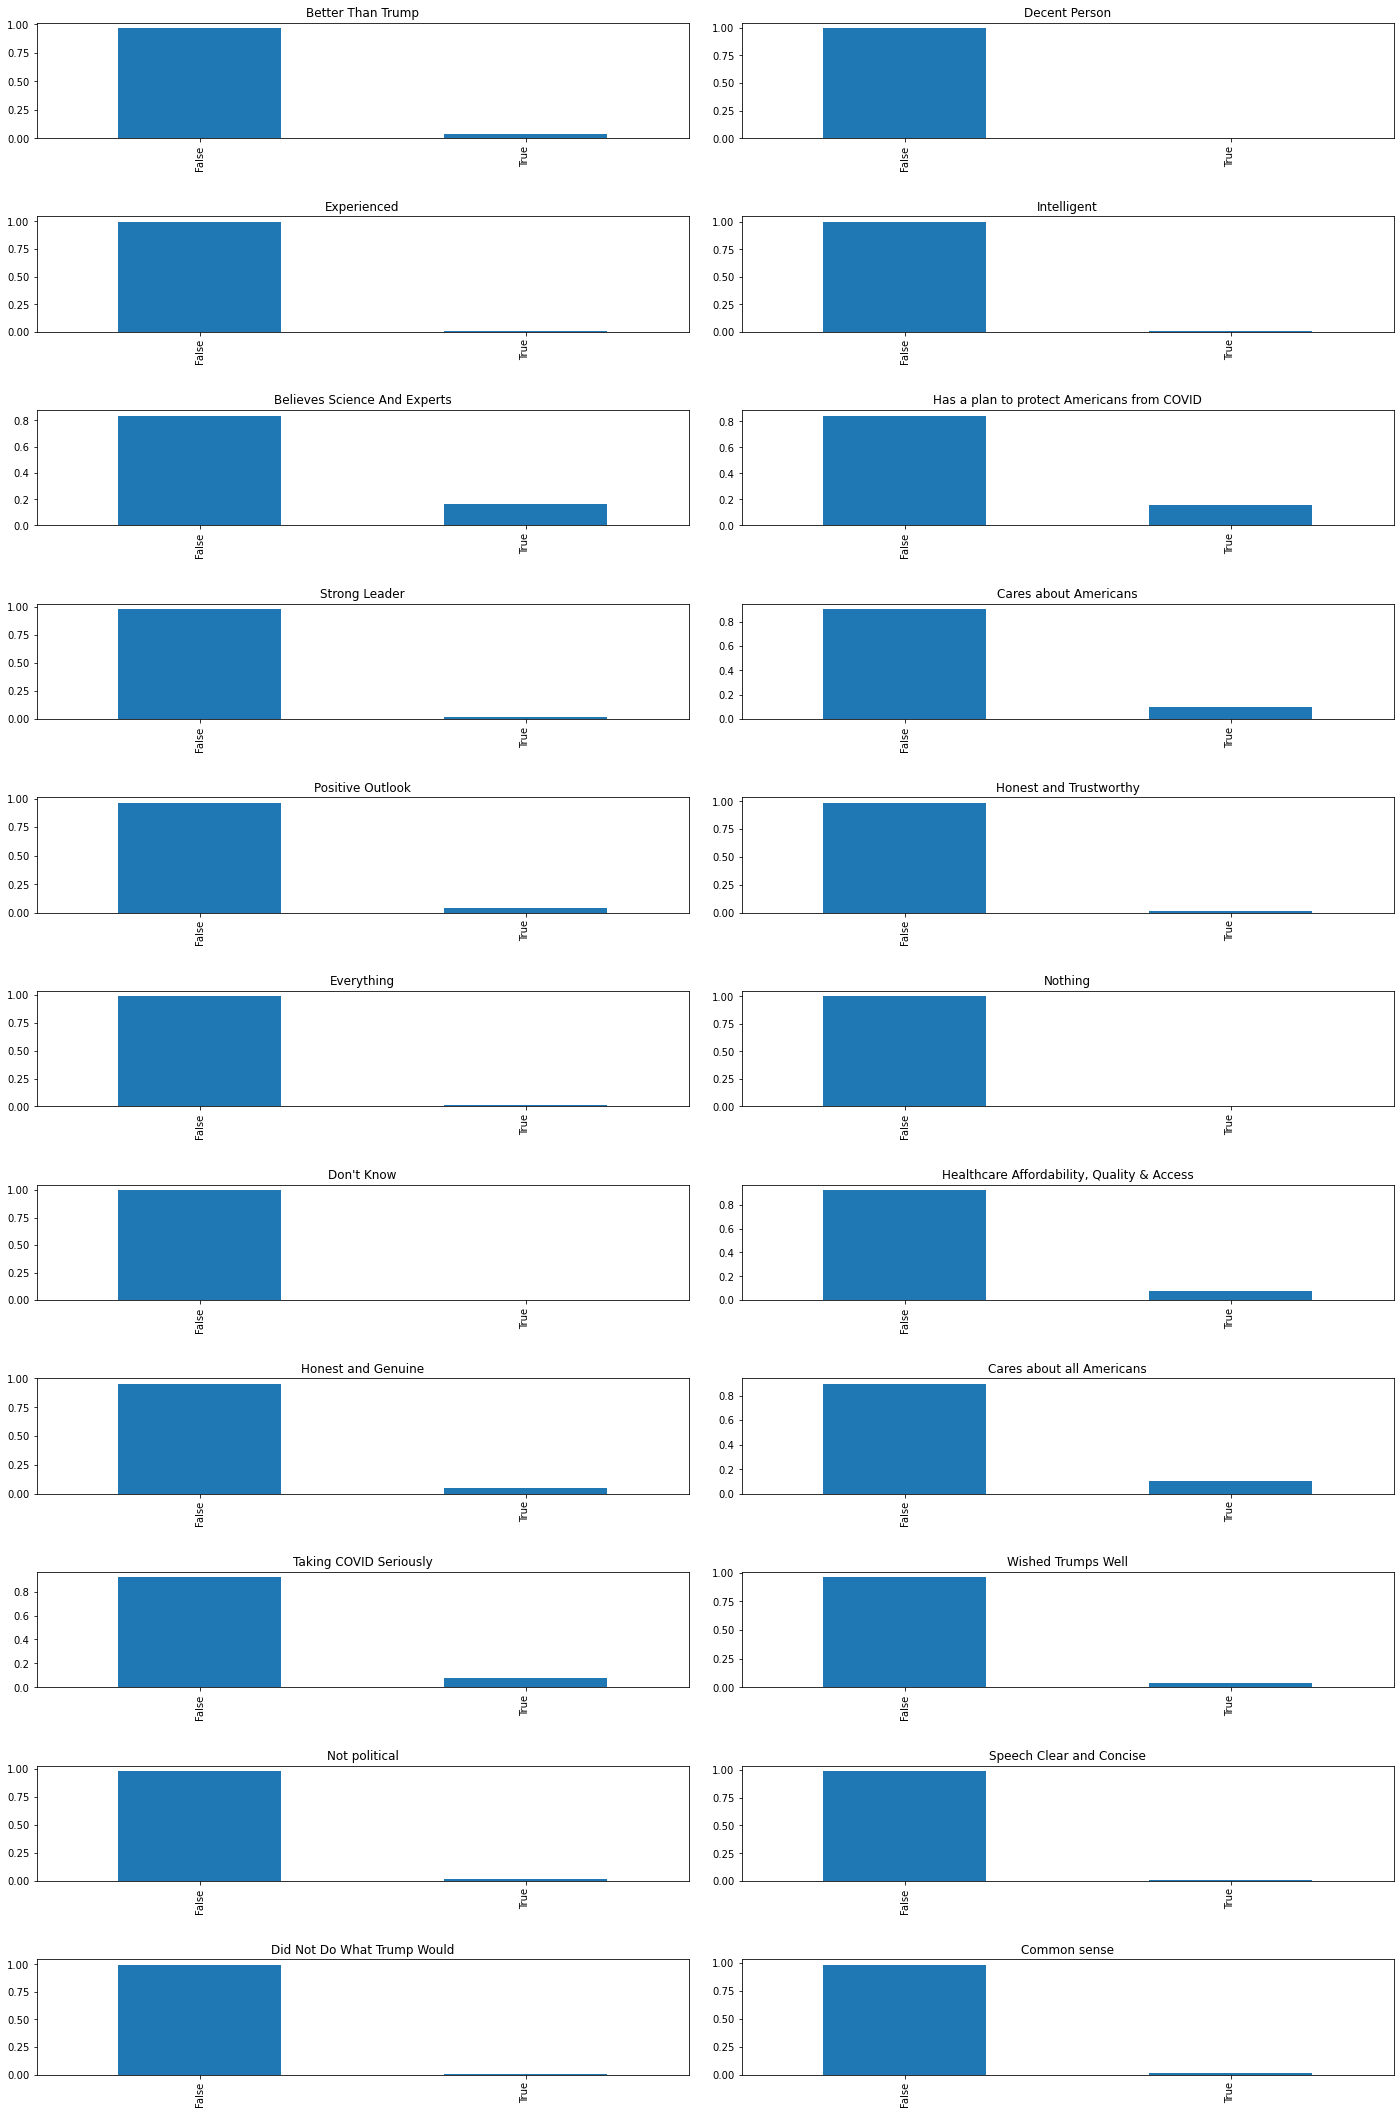

In [4]:
# Creates new DataFrame without open text column and generates a dictionary of individual features with corresponding results
binary_df = survey_df.drop(columns=["text"])
value_counts = {}
columns = list(binary_df.columns)
for col in columns:
    value_counts[col] = binary_df[col].value_counts(normalize=True)

# Data viz
nrow = 11
ncol = 2
fig, axes = plt.subplots(nrow, ncol)

i = 0
for r in range(nrow):
    for c in range(ncol):
        value_counts[columns[i]].plot(
            kind="bar", ax=axes[r, c], figsize=(20, 30), title=columns[i])
        i +=1

fig.tight_layout(pad=3.0)

> It seems that the dominant value across all binary features is `False`. Let's find out what are the 5 features with the least `False` counts:

In [5]:
less_false = binary_df.describe()[-1:].values.argsort()[0][:5]
print("Features with the least False counts:")
print()
for i, col in enumerate(columns):
    if i in less_false:
        print(f"{col}: {binary_df[col].value_counts()[0]}")

Features with the least False counts:

Believes Science And Experts: 3849
Has a plan to protect Americans from COVID: 3883
Cares about Americans: 4154
Cares about all Americans: 4130
Taking COVID Seriously: 4239


## **"Text" feature exploration**

### Getting corpus stats

In [6]:
nlp = set_nlp_pipeline()
corpus_stats, other_stats, other_lang_sents = get_corpus_stats(survey_df["text"], nlp)

In [7]:
print(f"% of English docs: {corpus_stats['english_docs'] / len(survey_df['text']):.3}")
print(f"% of Other Lang docs: {corpus_stats['other_lang_docs'] / len(survey_df['text']):.3}")
print(f"Other langs detected: {len(corpus_stats['other_langs'])}")
print(f"Total tokens (English + Other): {corpus_stats['all_token_count']}")
print(f"Total English tokens: {corpus_stats['en_token_count']}")
print(f"Total Other tokens: {corpus_stats['other_token_count']}")
print(f"Avg. doc length: {corpus_stats['avg_doc_length']:.4}")
print(f"Type-token ratio (English + Other): {corpus_stats['all_type_tok_ratio']:.3}")
print(f"Type-token ratio English: {corpus_stats['en_type_tok_ratio']:.3}")
print(f"Type-token ratio Other: {corpus_stats['other_type_tok_ratio']:.3}")
print(f"Total unique tokens (English + Other): {len(corpus_stats['all_unique_toks'])}")
print(f"Total unique tokens English: {len(corpus_stats['en_unique_toks'])}")
print(f"Total unique tokens Other: {len(corpus_stats['other_unique_toks'])}")

% of English docs: 0.889
% of Other Lang docs: 0.111
Other langs detected: 32
Total tokens (English + Other): 50668
Total English tokens: 49181
Total Other tokens: 1487
Avg. doc length: 11.0
Type-token ratio (English + Other): 0.0667
Type-token ratio English: 0.0642
Type-token ratio Other: 0.371
Total unique tokens (English + Other): 3378
Total unique tokens English: 3156
Total unique tokens Other: 552


> The Language Detector object identified over 11% of the documents as containing a different language than English. Therefore, it appears that there might be linguistic phenomena injecting noise into the data, such as code switching or word mispellings. Let's explore this further:

In [8]:
# Gets random sample of 30 documents
random.sample(other_lang_sents, 30)

['hello America ',
 'I dont',
 'His beliefs in science.',
 'No comment ',
 'maybe joe biden is good but i dont like him',
 'help to eliminate covid',
 'all person',
 'confidence',
 'Good ',
 'safety',
 'Joe is gonna make America stronger ',
 'honesty',
 'Family value ',
 'WARING MASKS, PRAYING FOR TRUMP',
 'He cares',
 'Yes.',
 'I like it',
 'He is very believable.',
 'SEPEACH',
 'Ware your mask',
 'I feel better.',
 'Inspiring message',
 'Es un buen candidato ',
 'I df invert knpw',
 "i believe it's true",
 '1',
 'cares for all',
 'His plans',
 'He behaves like an adult human',
 'good work and good man']

> As we can see, most of the sentences are in English, though there are two in Spanish and several of them with either i) mispellings, ii) few-word sentences, or iii) sentences that don't make sense from a lexical point of view.

### Raw Wordcloud

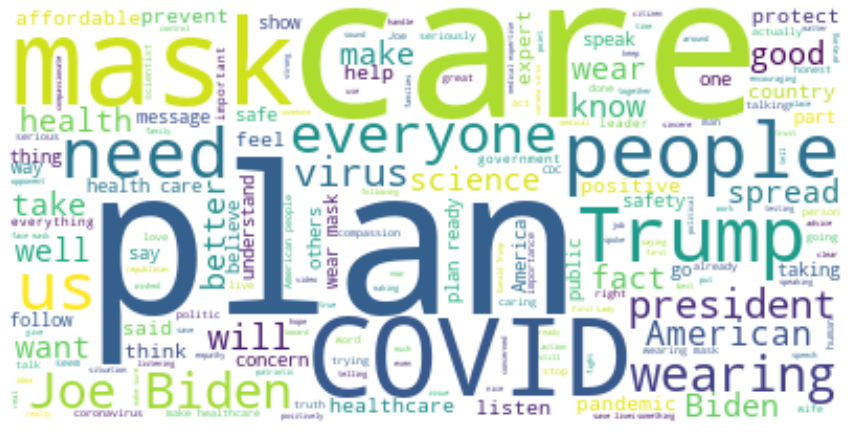

In [9]:
stopwords = set(STOPWORDS)
stopwords.update("to", "I", "Others", ":", "'", "''", "with", "to", "a", "for", "(", ")", "?", ",", ".", 
                 "RE", "u", "He", "'s", "n't", "`s")
survey_text = " ".join([text for text in survey_df["text"]])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(survey_text)
plt.figure(figsize=[15, 8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:title={'center':'Top 50 word frequencies'}, xlabel='0'>

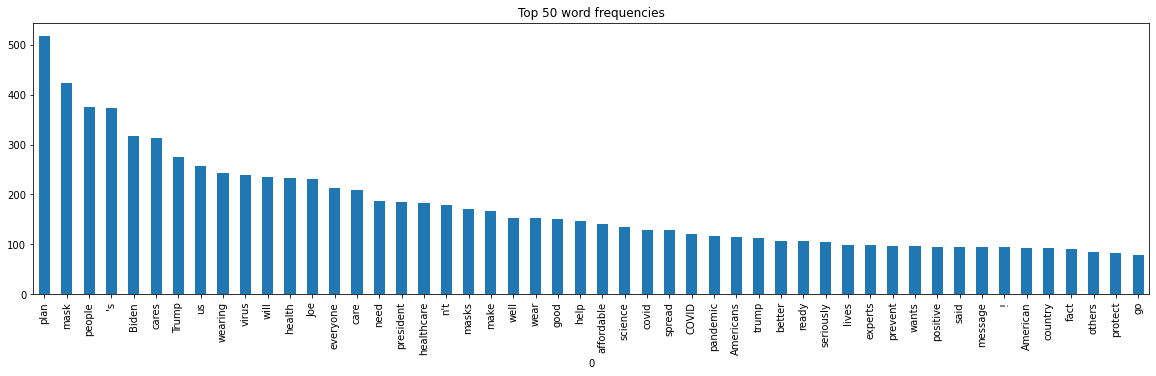

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

tokens = word_tokenize(survey_text)
text_count = Counter([tok for tok in tokens if tok.lower() not in stopwords])
pd.DataFrame(text_count.most_common(50)).set_index(0).plot(
    kind="bar", figsize=(20, 5), title="Top 50 word frequencies", legend=None)

> A quick check on Zipf's Law (not including stop words). Some noisy tokens like "'s" and "n't" are coming into the data, which would require further cleaning (perhaps through regex).

### POS Count and Lexical Density

In [11]:
print(f"Lexical density: {other_stats['lexical_density']:.3}")

Lexical density: 0.107


<AxesSubplot:title={'center':'POS frequencies'}>

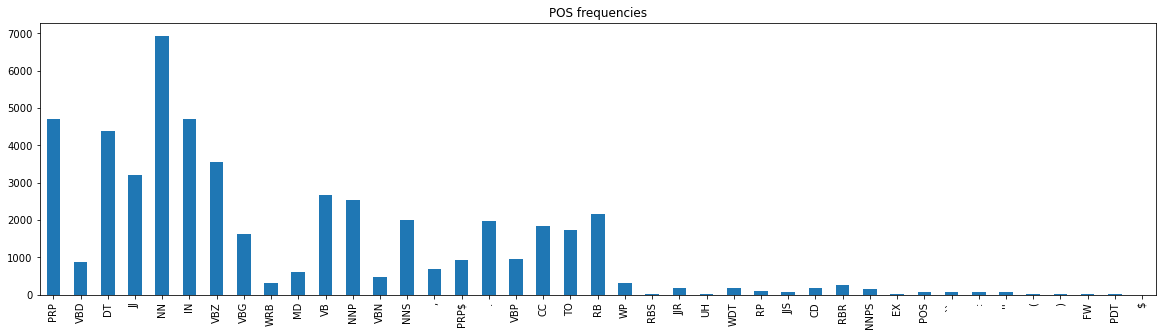

In [12]:
pos_df = pd.DataFrame(other_stats["pos_frequencies"].values(), other_stats["pos_frequencies"].keys())
pos_df.plot(kind="bar", figsize=(20, 5), title="POS frequencies", legend=None)

> A low lexical density (i.e., the proportion of open-class words over total words) might mean that there's not that much meaningful information in the open text provided.
>
> In fact, there seems to be a high number of closed-class words such as determiners (DT), interjections (IN), and personal pronouns (PRP), which don't carry much informational value.

## **Summary of findings**

### General insights
* There's a total of 4,608 responses and all have been fully recorded.
* There are no missing values in the dataset.

### Insights on binary features
* All of the features in the dataset are dominated by the `False` value, suggesting a deeper dive into the nature of these responses. 
* However, the features with the least False might shed some light on the kinds of words and topics that might resonate positively with people. Here's the top 5 of such features along with their respective `True` count:
    * *Believes Science And Experts*: 759
    * *Has a plan to protect Americans from COVID*: 725
    * *Cares about Americans*: 454
    * *Cares about all Americans*: 478
    * *Taking COVID Seriously*: 369

### Insights on the open text feature
* There are a total of 50,673 tokens across all documents (open-ended responses).
* The average tokens per document is 11, which suggests that responses are rather short.
* Using SpaCy's `LanguageDetector()` object, an estimated 11% of overall documents (about 516) were found to be in a different language than English. However, after taking a deeper look into the `other_lang_sents` list, most of them were found to be in English but holding one or several of the following characteristics:
    * Tokens without any lexical sense (i.e., "pk")
    * Very short phrases (between 1 and 5 tokens long) or long phrases with repeteative words (i.e., "nonoe none none none none none none none none none none none")
    * Phrases with mispelled words (i.e., "He *hasa* plan" or "*Donal tramp*")
    * Sentences in other languages (i.e., Spanish)
* Digging further into this phenomena, we can see a considerable difference (over 5X) in type/token ratios between both categories (English vs Other)
    * Type-token ratio English: 0.0641
    * Type-token ratio Other: 0.371 
* Hence, documents bucketed into the "Other" category might contain noise and should be looked at in more detail before deciding to incorporate them further into the analysis.
* Lastly, the average lexical density across all documents is 10.7%, which means that the proportion of open-class words to all words is relatively low. This suggests that the open-ended responses recorded are not very expressive.